In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import euclidean_distances
import matplotlib.pyplot as plt
%matplotlib inline

# DBSCAN implementation

In [2]:
class DBSCAN:
    
    def __init__(self, X, eps, min_pts):
        self.eps = eps
        self.min_pts = min_pts
        self.X = X
        self.n_rows = X.shape[0]
        
        #  0 - unclassified
        # -1 - Noise
        # >0 - cluster id the point belngs to
        self.lable = np.zeros(self.n_rows)
        
        # preconpute distance matrix
        self.distances = euclidean_distances(self.X)
            
    def rangeQuery(self, pid):
        return np.where(self.distances[pid] <= self.eps)[0]
    
    def fit(self):
        c_id = 0
        
        for n in range(self.n_rows):
            if self.lable[n] != 0:
                continue
            
            # get neighbours for point
            neighbours = self.rangeQuery(n)
            
            # density check
            if len(neighbours) < self.min_pts:
                self.lable[neighbours] = -1
                continue
            
            c_id += 1
            self.lable[n] = c_id
            
            # grow cluster
            idx = 0
            while idx < len(neighbours):
                _n = neighbours[idx]
                idx += 1
                
                # check if already processed
                if self.lable[_n] > 0:
                    continue
                    
                # add point to cluster
                self.lable[_n] = c_id
                _neighbours = self.rangeQuery(_n)
                
                # if core point, add to original neighbours
                if len(_neighbours) >= self.min_pts:
                    neighbours = np.concatenate((neighbours, _neighbours))

            
    def fit_and_plot(self):
        self.fit()
        self.plot()
    
    def plot(self, size=10):
        plt.scatter(self.X[:, 0], self.X[:, 1], c=self.lable, s=size)

## P5

In [3]:
df = pd.read_csv('../data/dbscan/dbscan.csv', index_col=1)

In [4]:
p5_X = df.iloc[:, 1:3].values

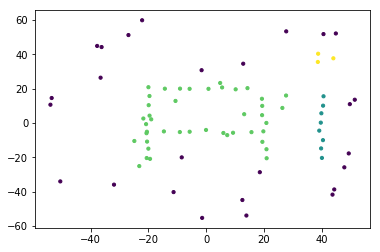

In [6]:
p5_db = DBSCAN(p5_X, 7.5, 3)
p5_labels = p5_db.fit_and_plot()

## P6
### circles

In [22]:
circles = pd.read_csv('../data/dbscan/circle.csv')

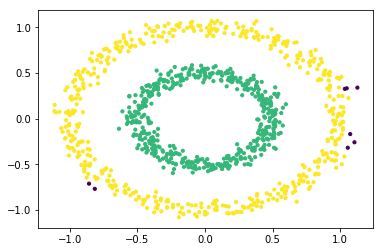

In [55]:
circles_X = circles.values
cir_db = DBSCAN(X=circles_X, eps=.1, min_pts=7)
cir_db.fit_and_plot()

### blobs

In [24]:
blobs = pd.read_csv('../data/dbscan/blobs.csv')

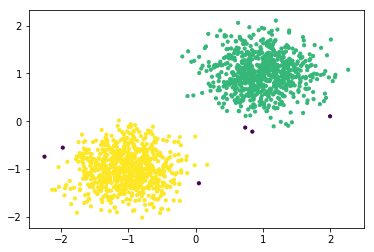

In [47]:
blobs_X = blobs.values
blobs_db = DBSCAN(X=blobs_X, eps=.25, min_pts=5)
blobs_db.fit_and_plot()

### moons

In [26]:
moons = pd.read_csv('../data/dbscan/moons.csv')

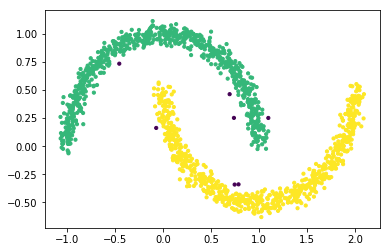

In [40]:
moons_X = moons.values
moons_db = DBSCAN(X=moons_X, eps=.07, min_pts=5)
moons_db.fit_and_plot()